In [9]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import random
import sys
import seaborn as sns
import pandas as pd
from collections import Counter

In [3]:
dataset = "Metaphors"
my_gene_to_age_dict = pickle.load(open("data/dataset_to_gene_to_age_dict.p","rb")) [dataset]
my_ages_list = list(my_gene_to_age_dict.values())
my_function_to_age_dict = pickle.load(open("data/function_to_age_%s_dict.p"%dataset,"rb"))

In [4]:
def get_data_in_dataframe(function_to_ages,ages_list,lq = None,mq=None,uq=None):
    if lq == None:
        len_list = [len(function_to_ages[func]) for func in function_to_ages]
        lq = np.percentile(len_list,25)
        mq = np.percentile(len_list,50)
        uq = np.percentile(len_list,75)
        
    #  make dict from era to proportion
    era_proportion_dict = dict(Counter(ages_list))
    for era in era_proportion_dict:
        era_proportion_dict[era]=era_proportion_dict[era]/len(ages_list)
    
    data = [] #function, ages_list, mean, std, len, rand_mean, rand_std
    for func in function_to_ages:
        for my_type in ["func_grouped","random_grouped"]:
            curr = []
            ages = np.array(function_to_ages[func])

            #remove Nones
            ages = ages[ages != np.array(None)]
            if len(ages) == 0:
                continue

            if my_type == "func_grouped":
                curr.append(func)
                curr.append(ages)

                ages_counts = Counter(ages)
                ages_num_eras = len(ages_counts)
                curr.append(ages_num_eras)

                """age_num_eras_more_than_1_over_num_eras_plus1 = 0 # significant eras
                for age in ages_counts:
                    if ages_counts[age] > len(ages)/(ages_num_eras+1):
                        age_num_eras_more_than_1_over_num_eras_plus1 +=1
                curr.append(age_num_eras_more_than_1_over_num_eras_plus1)"""
                # signif area, more than 10% more than by random chance
                signif_more_than_random=0
                for age in ages_counts:
                    if ages_counts[age]/len(ages) > era_proportion_dict[age]*1.1:
                        signif_more_than_random +=1
                curr.append(signif_more_than_random)
                

            else: #random
                curr.append("no_func_name")
                ages_list = np.array(ages_list)
                ages_list = ages_list[ages_list != np.array(None)]
                rand_ages = np.array(random.sample(list(ages_list),len(ages)))
                curr.append(rand_ages)
                
                rand_ages_counts = Counter(rand_ages)
                rand_ages_num_eras = len(rand_ages_counts)
                curr.append(rand_ages_num_eras)

                """rand_age_num_eras_more_than_1_over_num_eras_plus1 = 0
                for rand_age in rand_ages_counts:
                    if rand_ages_counts[rand_age] > len(rand_ages)/(rand_ages_num_eras+1):
                        rand_age_num_eras_more_than_1_over_num_eras_plus1 += 1
                curr.append(rand_age_num_eras_more_than_1_over_num_eras_plus1)"""
                rand_signif_more_than_random = 0
                for rand_age in rand_ages_counts:
                    if rand_ages_counts[rand_age]/len(rand_ages) > era_proportion_dict[rand_age]*1.1:
                        rand_signif_more_than_random +=1
                curr.append(rand_signif_more_than_random)
        
            curr.append(len(ages))
            curr.append(my_type)
            
            if len(ages) < lq:
                curr.append("Less Than %d Genes"%lq)
            elif len(ages) < mq:
                curr.append("Less Than %d Genes"%mq)
            elif len(ages) < uq:
                curr.append("Less Than %d Genes"%uq)
            else:
                curr.append("Largest Gene Sets")
            
            
            data.append(curr)
        
        
    df = pd.DataFrame(data)
    df.columns = ['function_name','ages_list',
                  'Num Eras','Significant Eras','num_els','Type','GeneSet']
    return df

In [5]:
df = get_data_in_dataframe(my_function_to_age_dict,my_ages_list)
df

,function_name,ages_list,Num Eras,Significant Eras,num_els,Type,GeneSet
0,GO:0032526~response to retinoic acid,"[0.2857142857142857, 0.7142857142857143, 0.571...",4,2,13,func_grouped,Less Than 25 Genes
1,no_func_name,"[0.5714285714285714, 0.5714285714285714, 0.714...",5,2,13,random_grouped,Less Than 25 Genes
2,GO:0005594~collagen type IX trimer,"[0.2857142857142857, 0.2857142857142857, 0.285...",1,1,3,func_grouped,Less Than 6 Genes
3,no_func_name,"[0.7142857142857143, 0.7142857142857143, 0.714...",1,1,3,random_grouped,Less Than 6 Genes
4,"IPR008996:Cytokine, IL-1-like","[0.2857142857142857, 0.2857142857142857, 0.142...",4,4,11,func_grouped,Less Than 25 Genes
5,no_func_name,"[0.0, 0.14285714285714285, 0.2857142857142857,...",6,4,11,random_grouped,Less Than 25 Genes
6,domain:TB 2,"[0.5714285714285714, 0.5714285714285714, 0.571...",1,1,5,func_grouped,Less Than 6 Genes
7,no_func_name,"[0.5714285714285714, 0.0, 0.2857142857142857, ...",4,3,5,random_grouped,Less Than 6 Genes
8,Osteogenesis imperfecta,"[0.2857142857142857, 0.5714285714285714, 0.428...",4,3,8,func_grouped,Less Than 10 Genes
9,no_func_name,"[0.7142857142857143, 0.5714285714285714, 0.142...",4,3,8,random_grouped,Less Than 10 Genes


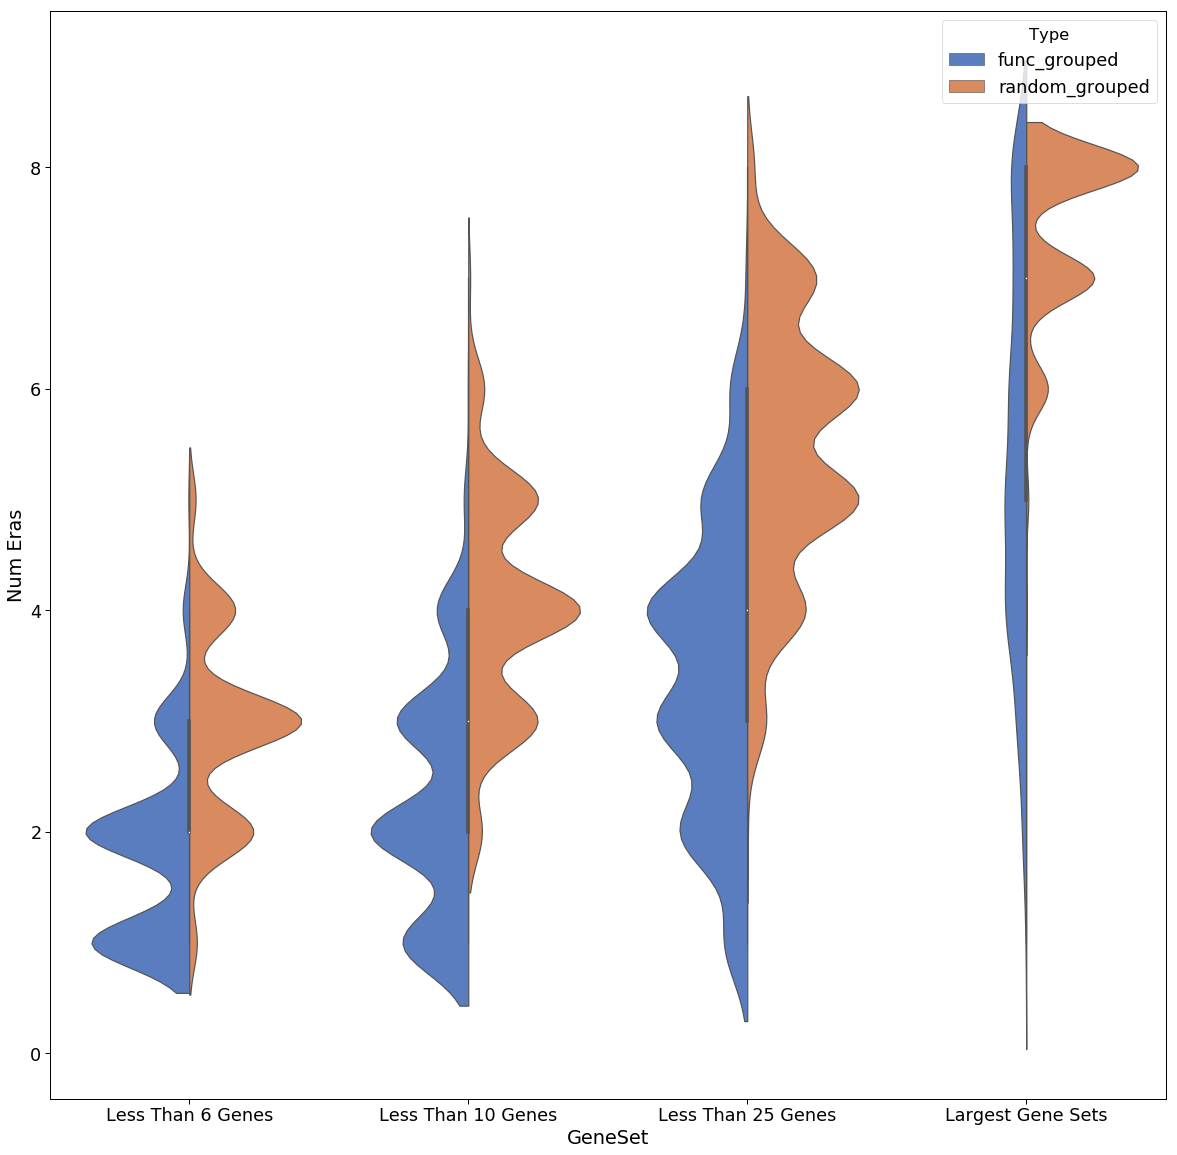

In [10]:
#PLOT VIOLIN OF number of "eras" GROUPED BY SET SIZE
len_list = [len(my_function_to_age_dict[func]) for func in my_function_to_age_dict]
lq = np.percentile(len_list,25)
mq = np.percentile(len_list,50)
uq = np.percentile(len_list,75)
        
v_df = df[["GeneSet","Num Eras", "Type"]]
sns.set_context("paper",font_scale = 2)
ax = sns.violinplot(x="GeneSet",y="Num Eras",data=v_df,order = ["Less Than %d Genes"%lq,"Less Than %d Genes"%mq ,"Less Than %d Genes"%uq,"Largest Gene Sets"],hue="Type",palette="muted",split=True)
plt.savefig("figures/violinplot_of_num_eras_in_%s.png"%dataset,dpi=600)
plt.show()

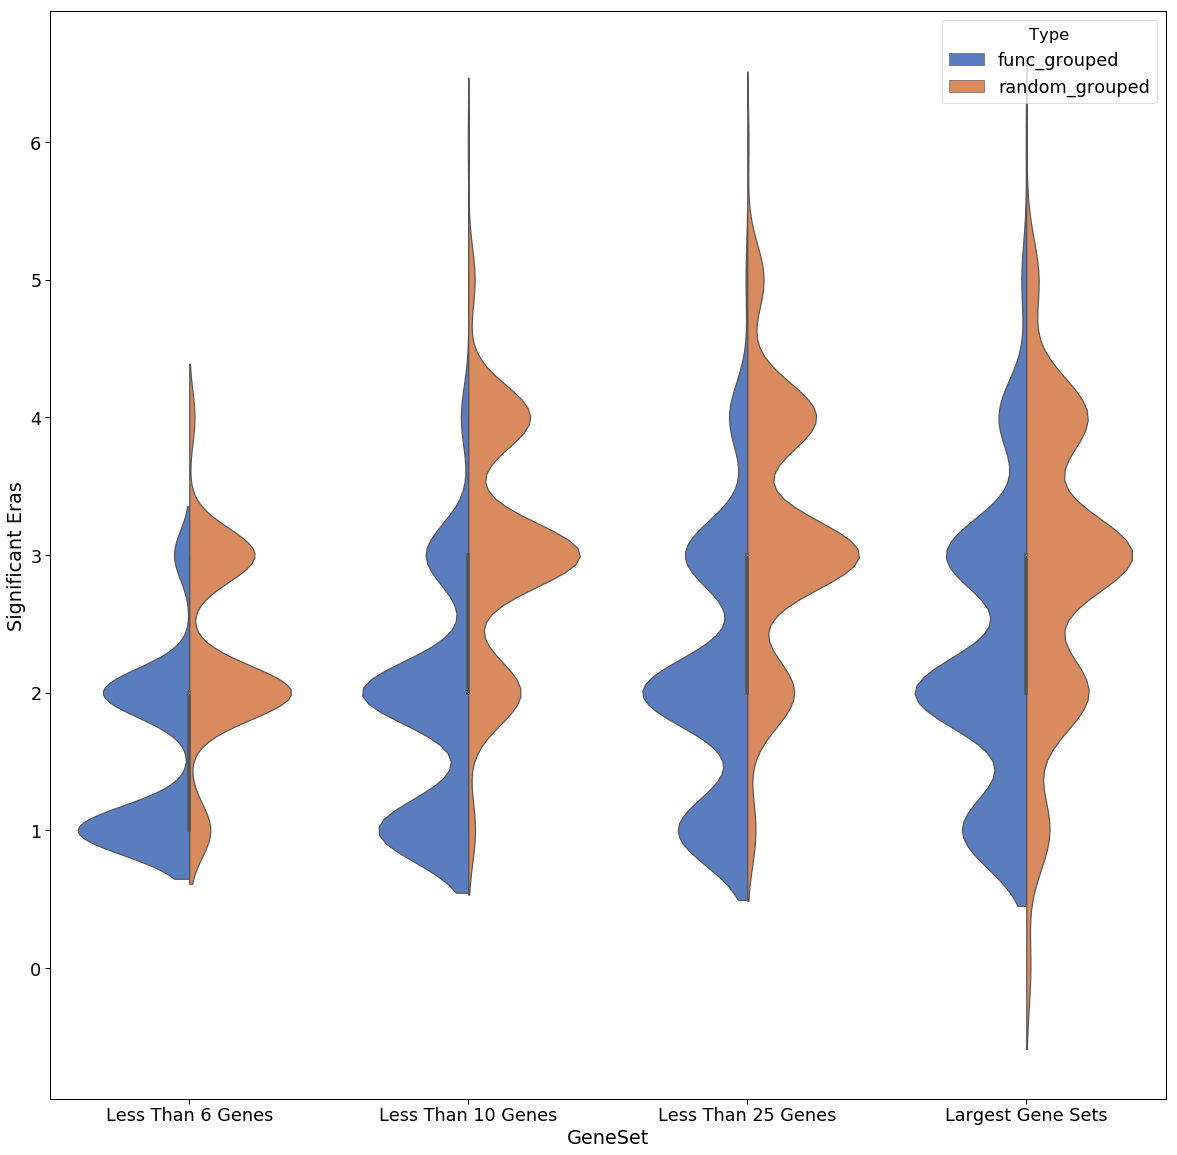

In [11]:
#PLOT VIOLIN OF number of "significant eras" GROUPED BY SET SIZE
len_list = [len(my_function_to_age_dict[func]) for func in my_function_to_age_dict]
lq = np.percentile(len_list,25)
mq = np.percentile(len_list,50)
uq = np.percentile(len_list,75)
        
v_df = df[["GeneSet","Significant Eras", "Type"]]
sns.set_context("paper",font_scale = 2)
ax = sns.violinplot(x="GeneSet",y="Significant Eras",data=v_df,order = ["Less Than %d Genes"%lq,"Less Than %d Genes"%mq ,"Less Than %d Genes"%uq,"Largest Gene Sets"],hue="Type",palette="muted",split=True)
plt.savefig("figures/violinplot_of_num_significant_eras_in_%s.png"%dataset,dpi=600)
plt.show()